In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from scipy.special import genlaguerre
from scipy.special import sph_harm
import scipy.integrate as integrate
import math
plt.rcParams['text.usetex'] = True
%matplotlib widget

In [2]:
def psi(n,l,m, r, theta, phi):
    a = 1
    return np.sqrt((2/(n*a))**3+math.factorial(n-l-1)/(2*n*math.factorial(n+l)))*np.exp(-r/(n*a))*(2*r/(n*a))**l*genlaguerre(n-l-1,2*l+1)(2*r/(n*a))*sph_harm(m,l,theta,phi)

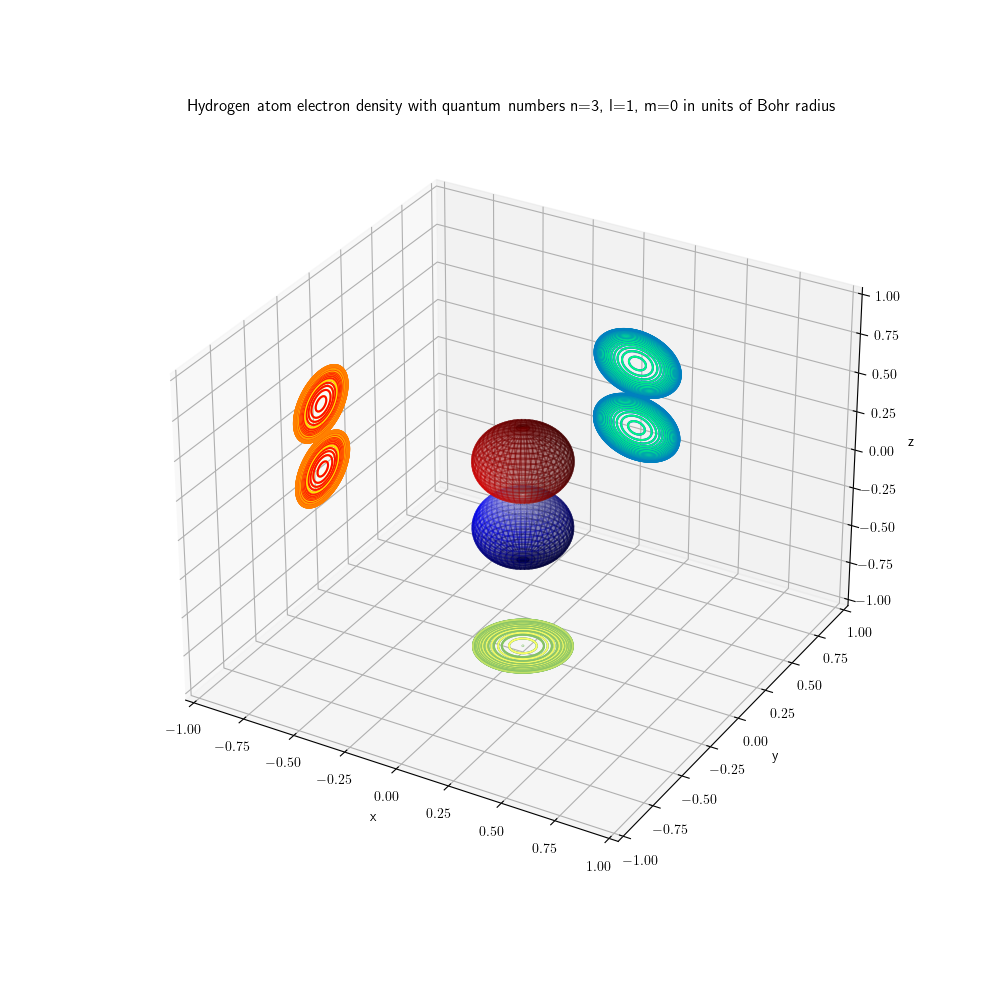

In [3]:
n,l,m = 3,1,0

phi, theta = np.linspace(0, np.pi, 500), np.linspace(0, 2*np.pi, 500)
phi, theta = np.meshgrid(phi, theta)

wf = psi(n,l,m,1,theta,phi)

x = np.sin(phi) * np.cos(theta) * abs(wf)
y = np.sin(phi) * np.sin(theta) * abs(wf)
z = np.cos(phi) * abs(wf)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fcolors = np.real((wf - wf.min())/(wf.max() - wf.min()))

ax.plot_surface(x, y, z, alpha=0.3,facecolors=cm.seismic(fcolors))

cset = ax.contour(x, y, z, 50, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x, y, z, 50, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x, y, z, 50, zdir='x',offset = -1, cmap='autumn')

ax.set_xlim(-1, 1)
ax.set_xlabel('x')
ax.set_ylim(-1, 1)
ax.set_ylabel('y')
ax.set_zlim(-1, 1)
ax.set_zlabel('z')

ax.set_title(f'Hydrogen atom electron density with quantum numbers $n$={n}, $l$={l}, $m$={m} in units of Bohr radius')

plt.show()